In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

# Load the CSV file
print("=== LOADING DATASET ===")
df = pd.read_csv('Housing.csv')
print(f"Dataset loaded successfully! Shape: {df.shape}")

# Display basic information about the dataset
print("\n=== DATASET OVERVIEW ===")
print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

=== LOADING DATASET ===
Dataset loaded successfully! Shape: (545, 13)

=== DATASET OVERVIEW ===
First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        f

In [2]:
# Data Preprocessing and Basic Analysis
print("\n=== DATA PREPROCESSING ===")

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Convert categorical variables to numerical for analysis
df_encoded = df.copy()
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                      'airconditioning', 'prefarea', 'furnishingstatus']

# Convert yes/no to 1/0
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                'airconditioning', 'prefarea']

for col in binary_columns:
    df_encoded[col] = df_encoded[col].map({'yes': 1, 'no': 0})

print("\nData types after encoding:")
print(df_encoded.dtypes)


=== DATA PREPROCESSING ===
Missing values in each column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Data types after encoding:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad             int64
guestroom            int64
basement             int64
hotwaterheating      int64
airconditioning      int64
parking              int64
prefarea             int64
furnishingstatus    object
dtype: object


In [3]:
# Basic Data Analysis - Calculating Averages
print("\n=== BASIC DATA ANALYSIS - AVERAGES ===")

# Calculate averages for numerical columns
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

averages = {}
for col in numerical_columns:
    averages[col] = df[col].mean()
    print(f"Average {col}: {averages[col]:.2f}")

# Additional statistical measures
print("\n=== PRICE ANALYSIS ===")
price_stats = {
    'Mean': df['price'].mean(),
    'Median': df['price'].median(),
    'Standard Deviation': df['price'].std(),
    'Minimum': df['price'].min(),
    'Maximum': df['price'].max()
}

for stat, value in price_stats.items():
    print(f"{stat}: ₹{value:,.2f}")

# Price distribution by furnishing status
print("\n=== PRICE BY FURNISHING STATUS ===")
furnishing_avg = df.groupby('furnishingstatus')['price'].agg(['mean', 'median', 'count'])
print(furnishing_avg.round(2))


=== BASIC DATA ANALYSIS - AVERAGES ===
Average price: 4766729.25
Average area: 5150.54
Average bedrooms: 2.97
Average bathrooms: 1.29
Average stories: 1.81
Average parking: 0.69

=== PRICE ANALYSIS ===
Mean: ₹4,766,729.25
Median: ₹4,340,000.00
Standard Deviation: ₹1,870,439.62
Minimum: ₹1,750,000.00
Maximum: ₹13,300,000.00

=== PRICE BY FURNISHING STATUS ===
                        mean     median  count
furnishingstatus                              
furnished         5495696.00  5075000.0    140
semi-furnished    4907524.23  4585000.0    227
unfurnished       4013831.46  3430000.0    178



=== CREATING VISUALIZATIONS ===


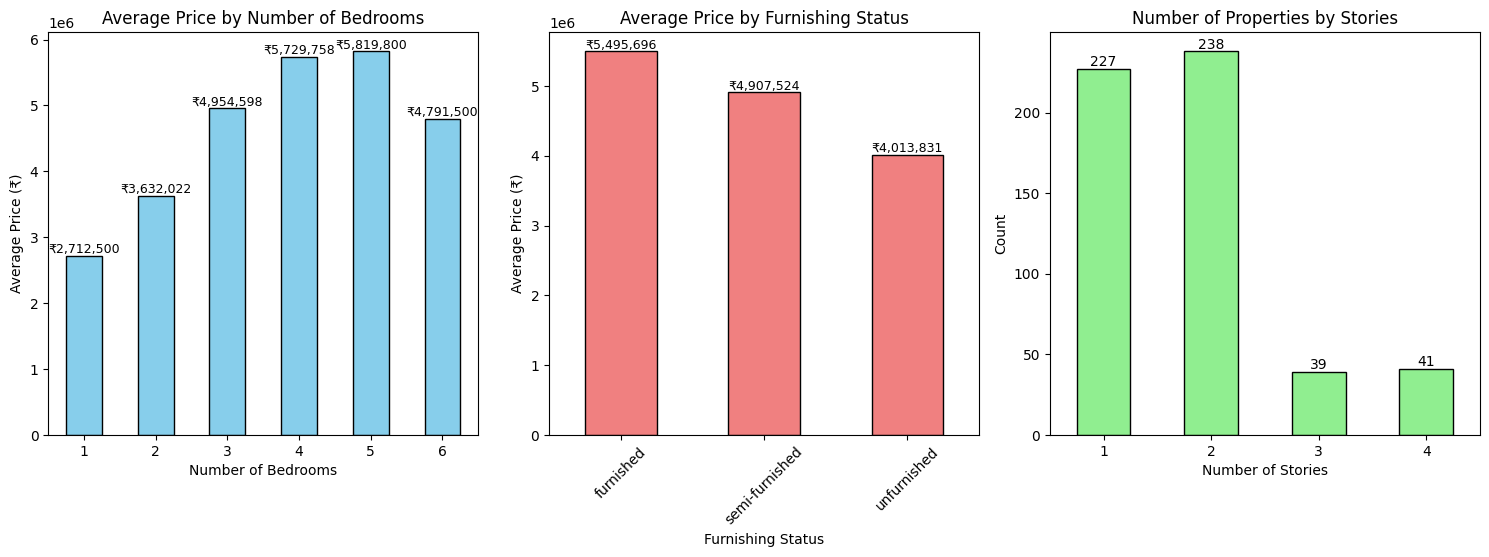

In [4]:
# Create Visualizations - Part 1: Basic Charts
print("\n=== CREATING VISUALIZATIONS ===")

# 1. Bar Chart - Average Price by Number of Bedrooms
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
bedroom_price = df.groupby('bedrooms')['price'].mean()
bedroom_price.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price (₹)')
plt.xticks(rotation=0)
# Add value labels on bars
for i, v in enumerate(bedroom_price):
    plt.text(i, v, f'₹{v:,.0f}', ha='center', va='bottom', fontsize=9)

# 2. Bar Chart - Average Price by Furnishing Status
plt.subplot(2, 3, 2)
furnishing_price = df.groupby('furnishingstatus')['price'].mean().sort_values(ascending=False)
furnishing_price.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Average Price by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Average Price (₹)')
plt.xticks(rotation=45)
for i, v in enumerate(furnishing_price):
    plt.text(i, v, f'₹{v:,.0f}', ha='center', va='bottom', fontsize=9)

# 3. Bar Chart - Count of Properties by Stories
plt.subplot(2, 3, 3)
stories_count = df['stories'].value_counts().sort_index()
stories_count.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Properties by Stories')
plt.xlabel('Number of Stories')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i, v in enumerate(stories_count):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

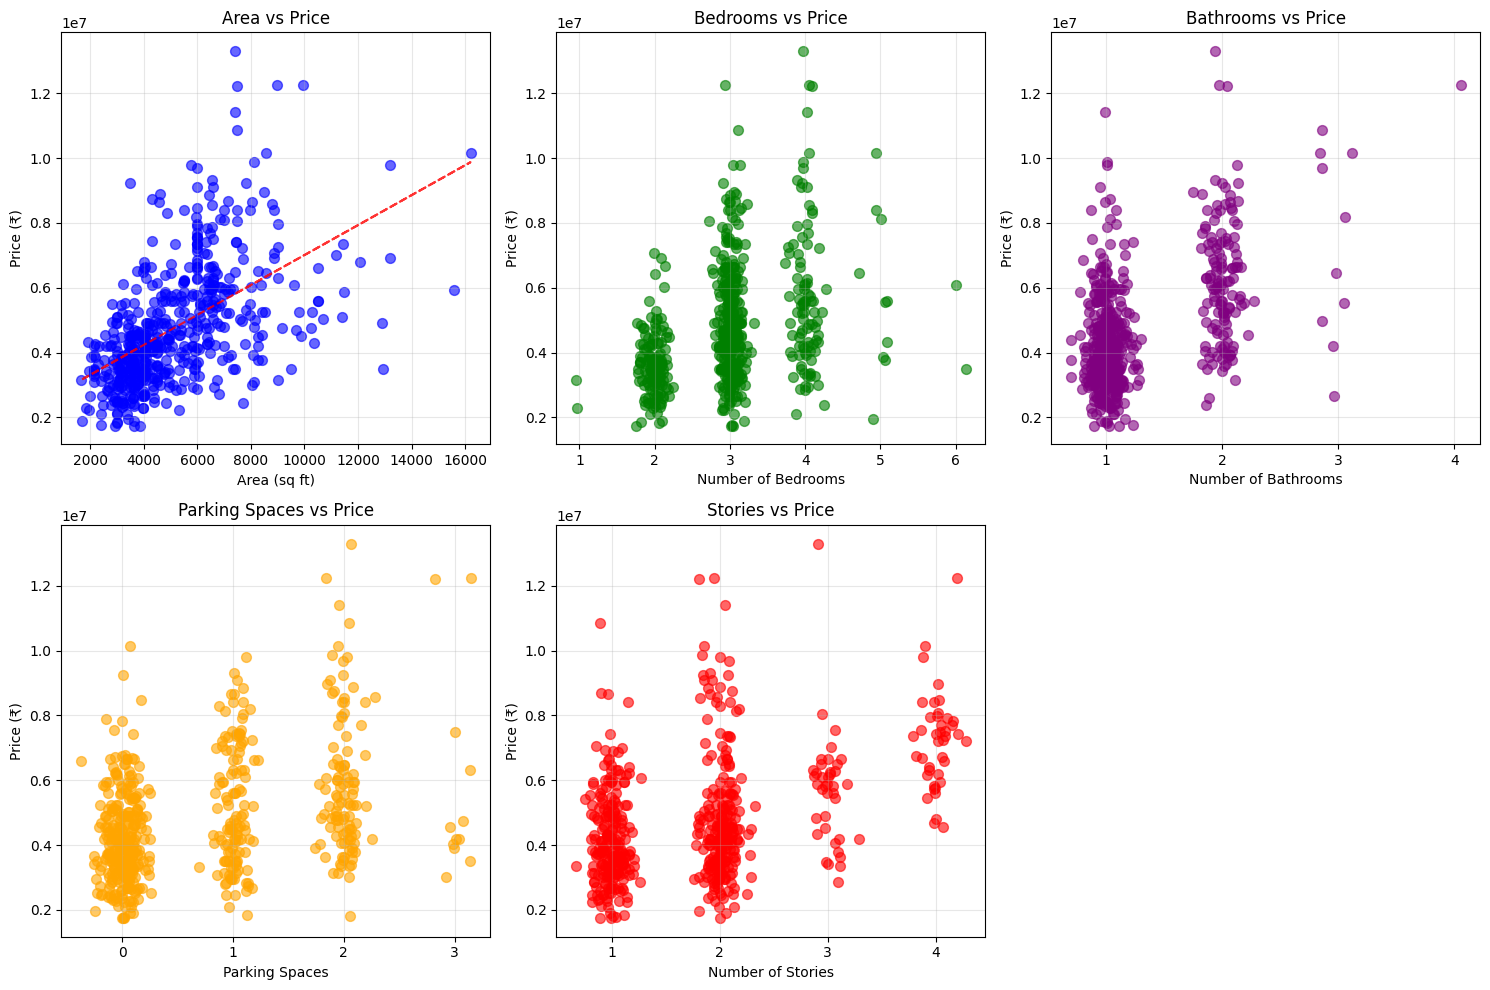

In [5]:
# Create Visualizations - Part 2: Scatter Plots
plt.figure(figsize=(15, 10))

# 1. Scatter Plot - Area vs Price
plt.subplot(2, 3, 1)
plt.scatter(df['area'], df['price'], alpha=0.6, color='blue', s=50)
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (₹)')
plt.title('Area vs Price')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['area'], df['price'], 1)
p = np.poly1d(z)
plt.plot(df['area'], p(df['area']), "r--", alpha=0.8)

# 2. Scatter Plot - Bedrooms vs Price (with jitter)
plt.subplot(2, 3, 2)
# Add small random jitter to make points visible
jitter = np.random.normal(0, 0.1, len(df))
plt.scatter(df['bedrooms'] + jitter, df['price'], alpha=0.6, color='green', s=50)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (₹)')
plt.title('Bedrooms vs Price')
plt.xticks(range(1, df['bedrooms'].max() + 1))
plt.grid(True, alpha=0.3)

# 3. Scatter Plot - Bathrooms vs Price
plt.subplot(2, 3, 3)
jitter = np.random.normal(0, 0.1, len(df))
plt.scatter(df['bathrooms'] + jitter, df['price'], alpha=0.6, color='purple', s=50)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (₹)')
plt.title('Bathrooms vs Price')
plt.xticks(range(1, df['bathrooms'].max() + 1))
plt.grid(True, alpha=0.3)

# 4. Scatter Plot - Parking vs Price
plt.subplot(2, 3, 4)
jitter = np.random.normal(0, 0.1, len(df))
plt.scatter(df['parking'] + jitter, df['price'], alpha=0.6, color='orange', s=50)
plt.xlabel('Parking Spaces')
plt.ylabel('Price (₹)')
plt.title('Parking Spaces vs Price')
plt.xticks(range(0, df['parking'].max() + 1))
plt.grid(True, alpha=0.3)

# 5. Scatter Plot - Stories vs Price
plt.subplot(2, 3, 5)
jitter = np.random.normal(0, 0.1, len(df))
plt.scatter(df['stories'] + jitter, df['price'], alpha=0.6, color='red', s=50)
plt.xlabel('Number of Stories')
plt.ylabel('Price (₹)')
plt.title('Stories vs Price')
plt.xticks(range(1, df['stories'].max() + 1))
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

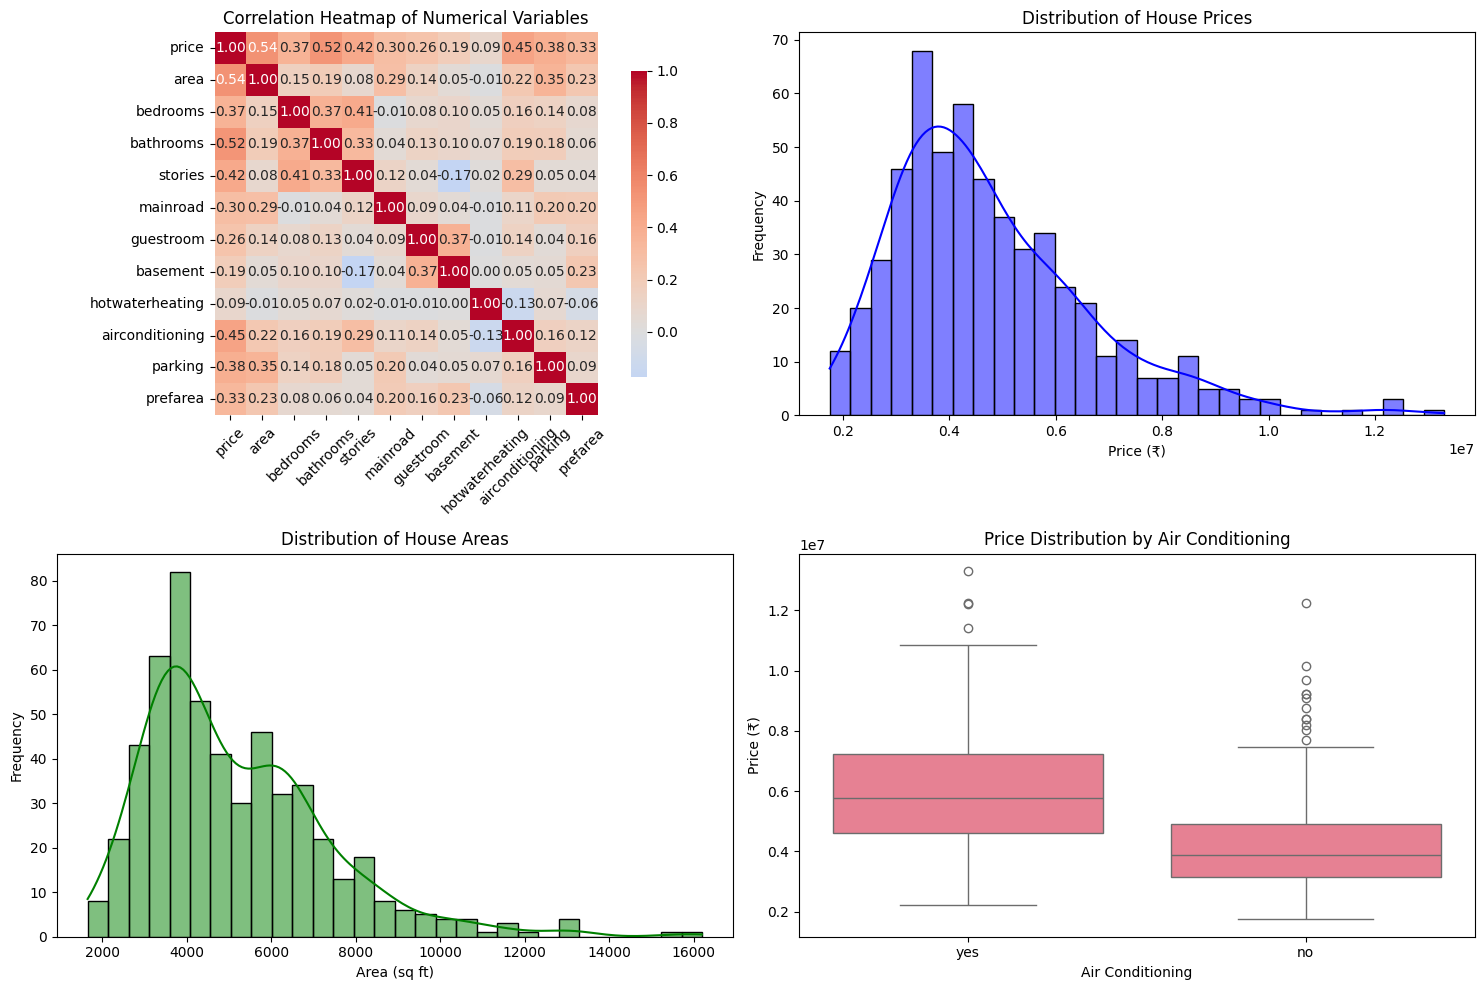

In [6]:
# Create Visualizations - Part 3: Heatmaps and Distribution Plots
plt.figure(figsize=(15, 10))

# 1. Correlation Heatmap
plt.subplot(2, 2, 1)
# Select only numerical columns for correlation
numerical_df = df_encoded.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap of Numerical Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# 2. Price Distribution
plt.subplot(2, 2, 2)
sns.histplot(df['price'], kde=True, color='blue', bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price (₹)')
plt.ylabel('Frequency')

# 3. Area Distribution
plt.subplot(2, 2, 3)
sns.histplot(df['area'], kde=True, color='green', bins=30)
plt.title('Distribution of House Areas')
plt.xlabel('Area (sq ft)')
plt.ylabel('Frequency')

# 4. Box Plot - Price by Air Conditioning
plt.subplot(2, 2, 4)
sns.boxplot(x='airconditioning', y='price', data=df)
plt.title('Price Distribution by Air Conditioning')
plt.xlabel('Air Conditioning')
plt.ylabel('Price (₹)')

plt.tight_layout()
plt.show()

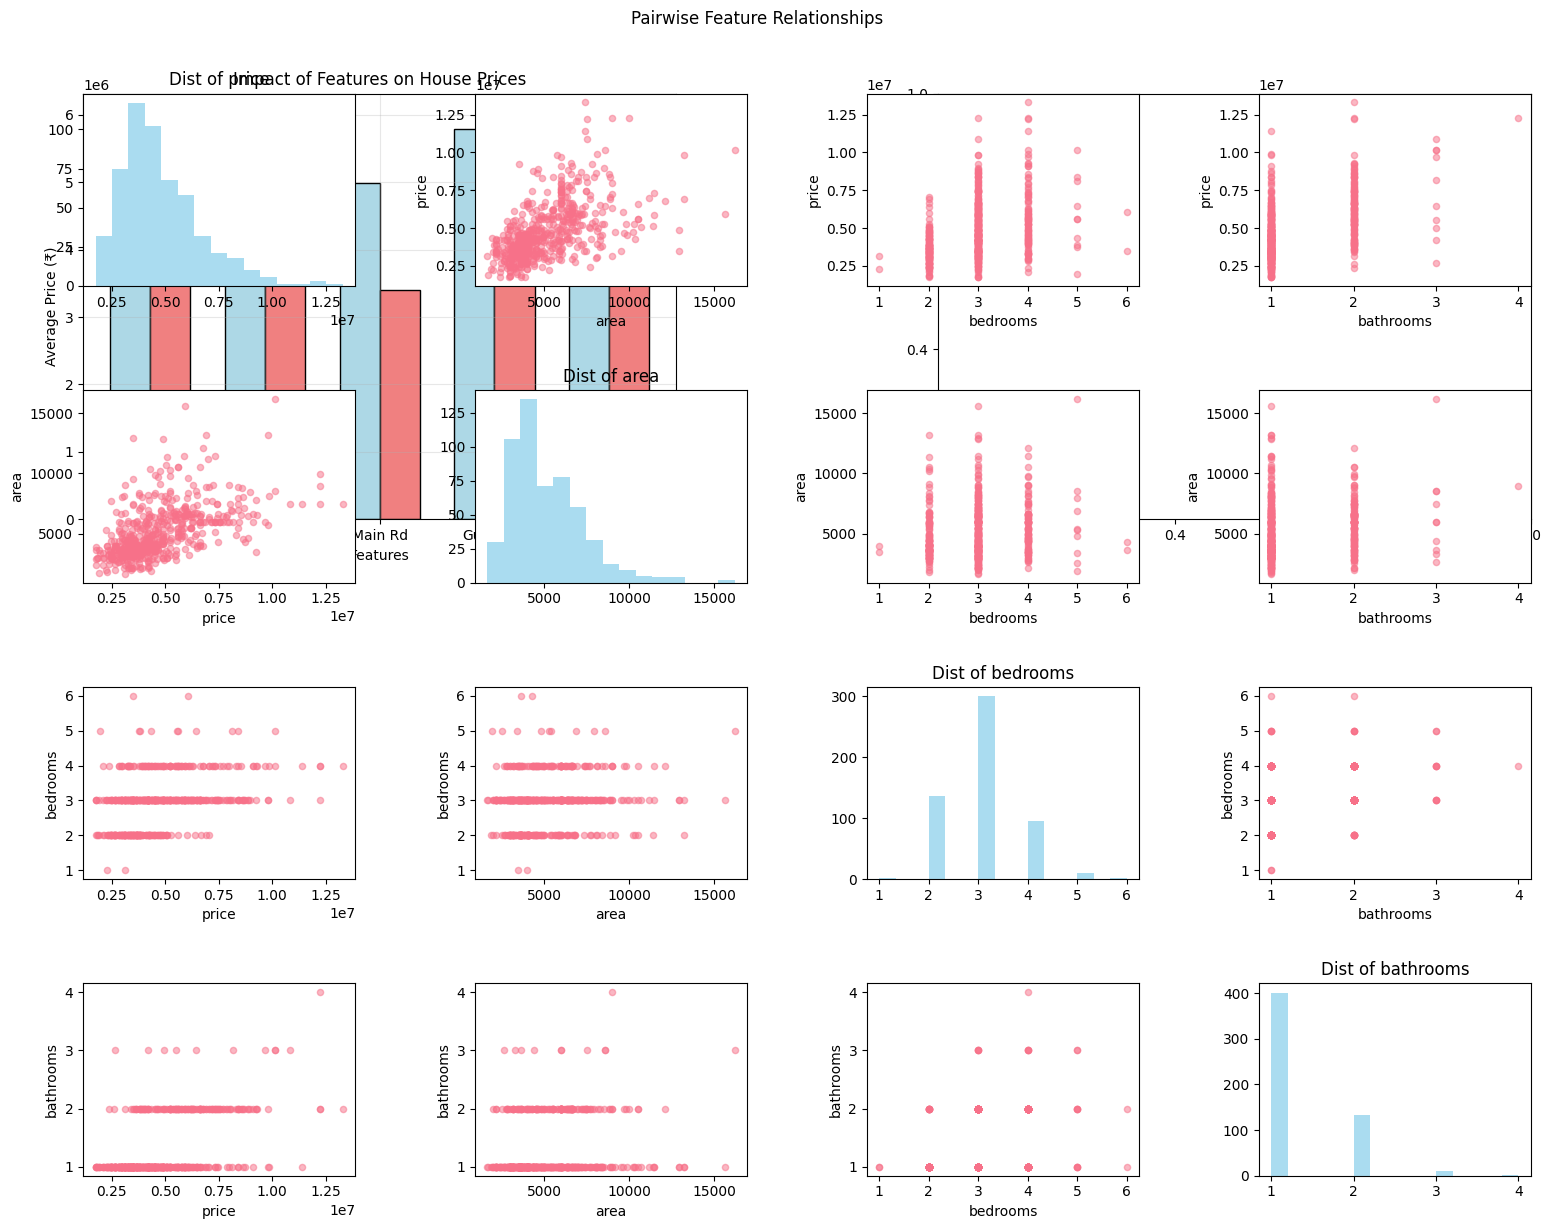

In [7]:
# Advanced Visualizations and Comparative Analysis
plt.figure(figsize=(16, 12))

# 1. Comparative Bar Chart - Features Impact on Price
plt.subplot(2, 2, 1)
features_to_compare = ['airconditioning', 'prefarea', 'mainroad', 'guestroom', 'basement']
feature_avgs = []



for feature in features_to_compare:
    avg_with = df[df[feature] == 'yes']['price'].mean()
    avg_without = df[df[feature] == 'no']['price'].mean()
    feature_avgs.append([avg_with, avg_without])

feature_avgs = np.array(feature_avgs)
x = np.arange(len(features_to_compare))
width = 0.35

plt.bar(x - width/2, feature_avgs[:, 0], width, label='With Feature', color='lightblue', edgecolor='black')
plt.bar(x + width/2, feature_avgs[:, 1], width, label='Without Feature', color='lightcoral', edgecolor='black')

plt.xlabel('Features')
plt.ylabel('Average Price (₹)')
plt.title('Impact of Features on House Prices')
plt.xticks(x, [f.replace('airconditioning', 'AC').replace('prefarea', 'Pref Area') 
              .replace('mainroad', 'Main Rd').replace('guestroom', 'GuestRm')
              .replace('basement', 'Basement') for f in features_to_compare])
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Pairwise Scatter Matrix
plt.subplot(2, 2, 2)
# Select key numerical features for pairwise analysis
key_features = ['price', 'area', 'bedrooms', 'bathrooms']
sample_df = df[key_features].sample(100, random_state=42)  # Sample for clarity

for i, feature1 in enumerate(key_features):
    for j, feature2 in enumerate(key_features):
        plt.subplot(4, 4, i*4 + j + 1)
        if i == j:
            plt.hist(df[feature1], bins=15, alpha=0.7, color='skyblue')
            plt.title(f'Dist of {feature1}')
        else:
            plt.scatter(df[feature2], df[feature1], alpha=0.5, s=20)
            plt.xlabel(feature2)
            plt.ylabel(feature1)
        plt.tight_layout()

plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()

In [8]:
# Insights and Observations Summary
print("=== DATA ANALYSIS INSIGHTS AND OBSERVATIONS ===")
print("\n1. PRICE DISTRIBUTION:")
print(f"   • Average house price: ₹{df['price'].mean():,.2f}")
print(f"   • Price range: ₹{df['price'].min():,.2f} to ₹{df['price'].max():,.2f}")
print(f"   • Most houses are priced between ₹{df['price'].quantile(0.25):,.2f} and ₹{df['price'].quantile(0.75):,.2f}")

print("\n2. PROPERTY CHARACTERISTICS:")
print(f"   • Average area: {df['area'].mean():.0f} sq ft")
print(f"   • Average bedrooms: {df['bedrooms'].mean():.1f}")
print(f"   • Average bathrooms: {df['bathrooms'].mean():.1f}")
print(f"   • Most common number of stories: {df['stories'].mode().iloc[0]}")

print("\n3. FEATURE IMPACT ON PRICE:")
# Calculate price premiums for features
for feature in ['airconditioning', 'prefarea', 'mainroad']:
    premium = (df[df[feature] == 'yes']['price'].mean() - df[df[feature] == 'no']['price'].mean()) / df[df[feature] == 'no']['price'].mean() * 100
    print(f"   • {feature}: {premium:+.1f}% price premium")

print("\n4. CORRELATION INSIGHTS:")
corr_with_price = numerical_df.corr()['price'].sort_values(ascending=False)
print("   Features most correlated with price:")
for feature, corr in corr_with_price.items():
    if feature != 'price':
        print(f"   • {feature}: {corr:.3f}")

print("\n5. FURNISHING STATUS IMPACT:")
furnishing_impact = df.groupby('furnishingstatus')['price'].mean()
for status, price in furnishing_impact.items():
    print(f"   • {status}: ₹{price:,.2f}")

print("\n6. KEY OBSERVATIONS:")
print("   • Area has the strongest positive correlation with price")
print("   • Air conditioning adds significant value to properties")
print("   • Furnished properties command higher prices than semi-furnished or unfurnished")
print("   • Preferred area locations show clear price premiums")
print("   • Number of bathrooms shows stronger correlation with price than bedrooms")
print("   • Most properties have 2-4 bedrooms and 1-3 bathrooms")

=== DATA ANALYSIS INSIGHTS AND OBSERVATIONS ===

1. PRICE DISTRIBUTION:
   • Average house price: ₹4,766,729.25
   • Price range: ₹1,750,000.00 to ₹13,300,000.00
   • Most houses are priced between ₹3,430,000.00 and ₹5,740,000.00

2. PROPERTY CHARACTERISTICS:
   • Average area: 5151 sq ft
   • Average bedrooms: 3.0
   • Average bathrooms: 1.3
   • Most common number of stories: 2

3. FEATURE IMPACT ON PRICE:
   • airconditioning: +43.4% price premium
   • prefarea: +32.9% price premium
   • mainroad: +46.9% price premium

4. CORRELATION INSIGHTS:
   Features most correlated with price:
   • area: 0.536
   • bathrooms: 0.518
   • airconditioning: 0.453
   • stories: 0.421
   • parking: 0.384
   • bedrooms: 0.366
   • prefarea: 0.330
   • mainroad: 0.297
   • guestroom: 0.256
   • basement: 0.187
   • hotwaterheating: 0.093

5. FURNISHING STATUS IMPACT:
   • furnished: ₹5,495,696.00
   • semi-furnished: ₹4,907,524.23
   • unfurnished: ₹4,013,831.46

6. KEY OBSERVATIONS:
   • Area has the


=== DETAILED ANALYSIS ===
Average price per sq ft: ₹993.33

Analysis by Bedroom Count:
               price           area bathrooms
                mean count     mean      mean
bedrooms                                     
1         2712500.00     2  3710.00      1.00
2         3632022.06   136  4636.24      1.06
3         4954598.13   300  5226.62      1.27
4         5729757.89    95  5582.06      1.62
5         5819800.00    10  6291.50      1.80
6         4791500.00     2  3950.00      1.50

Top 10 Most Expensive Properties:
   price  area  bedrooms  bathrooms furnishingstatus
13300000  7420         4          2        furnished
12250000  8960         4          4        furnished
12250000  9960         3          2   semi-furnished
12215000  7500         4          2        furnished
11410000  7420         4          1        furnished
10850000  7500         3          3   semi-furnished
10150000  8580         4          3   semi-furnished
10150000 16200         5          3    

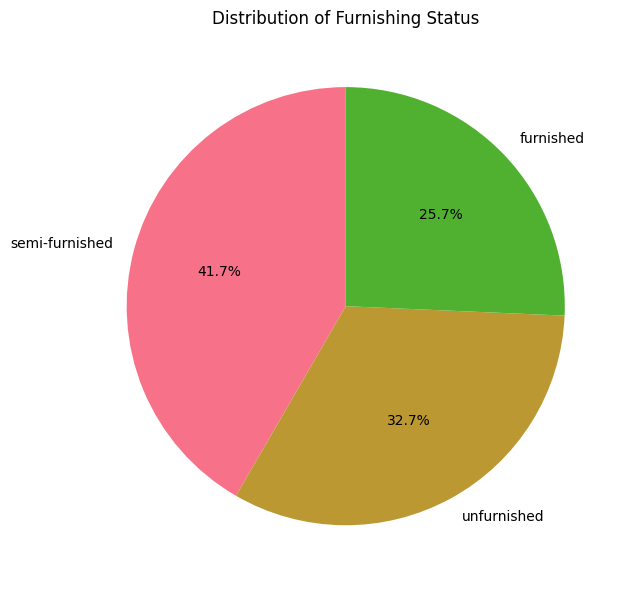


=== ANALYSIS COMPLETE ===
Summary: The dataset shows clear relationships between property features and prices,
with area, number of bathrooms, and amenities being key price drivers.


In [9]:
# Additional Detailed Analysis
print("\n=== DETAILED ANALYSIS ===")

# Price per square foot analysis
df['price_per_sqft'] = df['price'] / df['area']
print(f"Average price per sq ft: ₹{df['price_per_sqft'].mean():.2f}")

# Analysis by bedroom count
print("\nAnalysis by Bedroom Count:")
bedroom_analysis = df.groupby('bedrooms').agg({
    'price': ['mean', 'count'],
    'area': 'mean',
    'bathrooms': 'mean'
}).round(2)

print(bedroom_analysis)

# Top 10 most expensive properties
print("\nTop 10 Most Expensive Properties:")
top_10_expensive = df.nlargest(10, 'price')[['price', 'area', 'bedrooms', 'bathrooms', 'furnishingstatus']]
print(top_10_expensive.to_string(index=False))

# Save processed data and visualizations
plt.figure(figsize=(10, 6))
df['furnishingstatus'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Furnishing Status')
plt.ylabel('')
plt.tight_layout()
plt.show()

print("\n=== ANALYSIS COMPLETE ===")
print("Summary: The dataset shows clear relationships between property features and prices,")
print("with area, number of bathrooms, and amenities being key price drivers.")